# Homework 4 writeup solutions

## Name: Jaiden Atterbury - Section B

## Problem 1

### Part a

Text(0.5, 0.92, 'Plot of Himmelblau’s function')

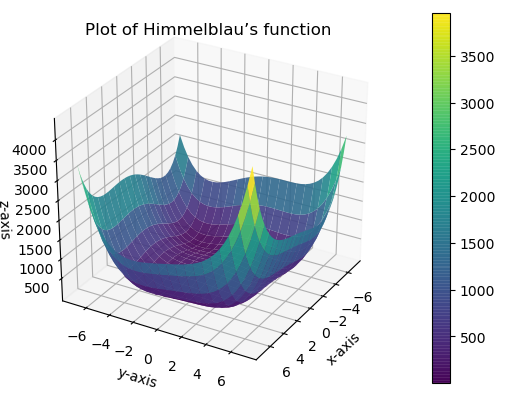

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize

# i.
f = lambda x, y: (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2
fp = lambda p: f(p[0], p[1])

# ii.
x = np.linspace(-7, 7, 40)
y = np.linspace(-7, 7, 40)
X, Y = np.meshgrid(x, y)

# iii. and iv.
fig = plt.figure(1) 
ax = plt.axes(projection='3d')
surface = ax.plot_surface(X, Y, f(X,Y), cmap = "viridis", linewidth=1, cstride = 2, rstride=2, alpha=0.9)
fig.colorbar(surface)
ax.view_init(30,30)
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")
ax.set_title("Plot of Himmelblau’s function")


### Part b

Text(0.5, 1.0, 'Contour Plot of Himmelblau’s function')

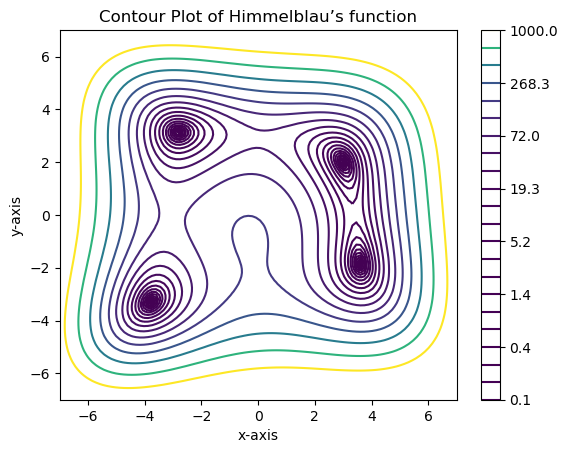

In [51]:
fig2 = plt.figure(2)
ax2 = plt.axes()

# i.
x = np.linspace(-7, 7, 100)
y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(x, y)

# ii. and iii.
surface = plt.contour(X, Y, f(X,Y), np.logspace(-1, 3, 22), cmap = "viridis") 

# iv.
plt.xlabel("x-axis")
plt.ylabel("y-axis")

# v.
fig2.colorbar(surface)

# vi.
plt.title("Contour Plot of Himmelblau’s function")

### Part c

Based on the plot again, we can see 4 approximate locations of minima.

In [52]:
min_1 = np.array([-3.7, -3.5])
min_2 = np.array([3.5, -1.8])
min_3 = np.array([3, 2])
min_4 = np.array([-3, 3.7])

f_min_1 = scipy.optimize.fmin(fp, min_1)
f_min_2 = scipy.optimize.fmin(fp, min_2)
f_min_3 = scipy.optimize.fmin(fp, min_3)
f_min_4 = scipy.optimize.fmin(fp, min_4)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 30
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 51
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 47
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 34
         Function evaluations: 67


Once we have found the minima, we can plot them.

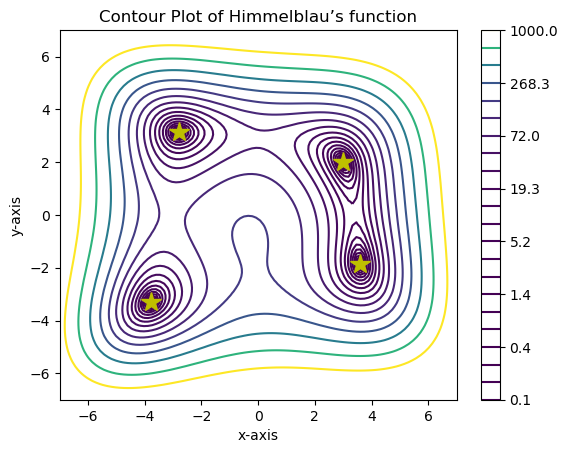

In [4]:
ax2.plot(f_min_1[0], f_min_1[1], "y*", markersize = 15)
ax2.plot(f_min_2[0], f_min_2[1], "y*", markersize = 15)
ax2.plot(f_min_3[0], f_min_3[1], "y*", markersize = 15)
ax2.plot(f_min_4[0], f_min_4[1], "y*", markersize = 15)

fig2

### Part d

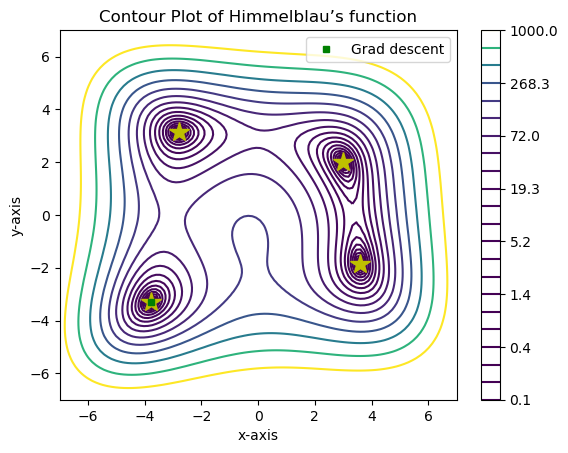

In [5]:
gradf_xy = lambda x, y: np.array([4*x**3 - 42*x + 4*x*y + 2 * y ** 2 - 14,
                                  4*y**3 - 26*y + 4*x*y + 2 * x ** 2 - 22])
gradf_p = lambda p: gradf_xy(p[0], p[1])

p = np.array([-3, -2])
tol = 10 ** -7
iterations = 0
for k in range(2000):
    grad = gradf_p(p)
    if abs(np.linalg.norm(grad)) < tol:
        break
    phi = lambda t: p - t * grad
    f_of_phi = lambda t: fp(phi(t))
    tstar = scipy.optimize.fminbound(f_of_phi, 0, 1)
    p = phi(tstar)
    iterations += 1
    
ax2.plot(p[0], p[1], "gs", markersize=5, label="Grad descent")
ax2.legend()

fig2

## Problem 2

### Part a

In [13]:
import time # Import the timing algorithm, 
            
p = np.array([2, 3])
tol = 1e-9
iterations = 0
start = time.time()
for k in range(8000):
    grad = gradf_p(p)
    if abs(np.linalg.norm(grad)) < tol:
        break
    phi = lambda t: p - t * grad
    f_of_phi = lambda t: fp(phi(t))
    tstar = scipy.optimize.fminbound(f_of_phi, 0, 1)
    p = phi(tstar)
    iterations += 1
end = time.time()

print("The above commands took " + str(end - start) +" seconds to complete.")
print("Number of iterations:", iterations)

The above commands took 0.015858173370361328 seconds to complete.
Number of iterations: 16


### Part b-d

In [71]:
def grad_desc_step(p, tol, tstep):
    iterations = 0
    start = time.time()
    for k in range(8000):
        grad = gradf_p(p)
        if abs(np.linalg.norm(grad)) < tol:
            break
        p = p - tstep*grad
        iterations += 1
    end = time.time()
    return np.array([p, iterations, end-start])

print(grad_desc_step(np.array([2,3]), 1e-9, 0.01))
print(grad_desc_step(np.array([2,3]), 1e-9, 0.02))
print(grad_desc_step(np.array([2,3]), 1e-9, 0.025))

[array([3., 2.]) 81 0.0036668777465820312]
[array([3., 2.]) 55 0.001712799072265625]
[array([3.23482283, 2.12502178]) 8000 0.19936585426330566]


### Part e - the results

 |             | Number Iterations | Time | Converged (Yes/No) |
 |---          | ---               | ---  |   ---              |
 |tstep = 0.01 |81|0.0029239654541015625  |      Yes           |
 |tstep = 0.02 |55|0.0020339488983154297  |      Yes           |
 |tstep = 0.025|8000|0.20737195014953613  |      No            |
 |`fminbound`  |16|0.015858173370361328   |      Yes           |
 

### Part f - discussion

- I found that the Gradient Descent algorithm did **not** always converge. The only case out of the four cases tested where the algorithm did not converge was the method with tstep of 0.025. The reason why this method did not converge was because the tstep of 0.025 was too large. Since this tstep was too large, we end up following the path of the negative gradient for too long, and thus skip over the minimum on each successive iteration of the algorithm.


- I found that Gradient Descent converged fastest with the method where we used the tstep of 0.02. In particular, the algorithm converged in a time of only 0.002 seconds.


- I found that Gradient Descent converged with the fewest iterations when using the fminbound method. In particular, the fminbound method took only 16 iterations to converge. However, the total time elapsed was 0.0159 seconds which was slower than both of the tstep methods that converged.


- As seen above, my answer for which algorithm converged fastest and which algorithm converged in the least amount of iterations was different. One reason why the tstep alogrithm may be slightly faster than the fminbound algortihm for this particular function and intial guess is because when using the tstep algorithm, there are less lines of code to run, and more importantly we don't have to solve an optimization problem (fminbound) on each iteration of our algorithm.


- **Optional:** The optimum tstep to make this algorithm converge the fastest according to my calculations is 0.0184375.